In [1]:
import random

import torch as t
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Problem 1
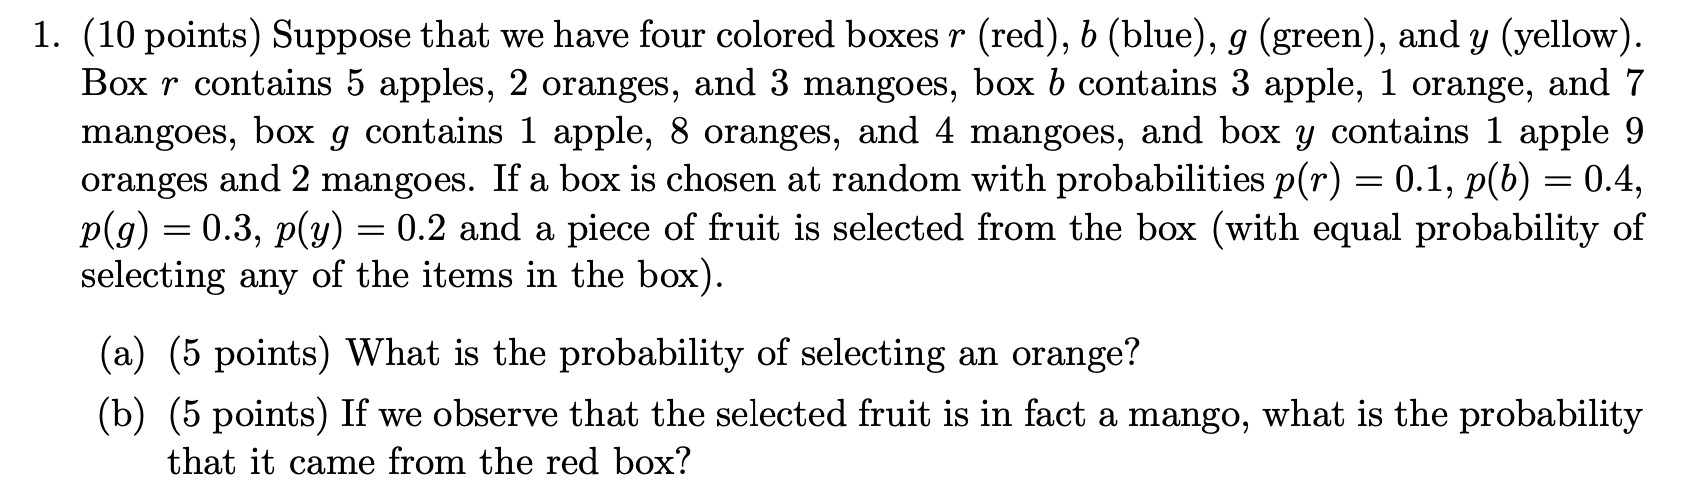

(a) We want to calculate the marginal probability distribution p(orange) because we don't care about boxes.

$p(X) = \sum_Y p(X|Y)p(Y)$ = p(orange) = p(orange|r)p(r) + p(orange|b)p(b) + p(orange|g)p(g) + p(orange|y)p(y)

In [2]:
p_r = 0.1
p_b = 0.4
p_g = 0.3
p_y = 0.2
p_o_r = 2/(5+2+3)
p_o_b = 1/(3+1+7)
p_o_g = 8/(1+8+4)
p_o_y = 9/(1+9+2)
p_o = p_o_r * p_r + p_o_b * p_b + p_o_g * p_g + p_o_y * p_y
print(f'probability is {p_o:.3f}')

probability is 0.391


(b) We want to know p(r|mango) = p(mango|r)p(r) / p(mango).

the only hard thing here is p(mango) which we calculate like above.

In [3]:
p_m_r = 3 / (5+2+3)
p_m_b = 7 / (3+1+7)
p_m_g = 4 / (1+8+4)
p_m_y = 2 / (1+9+2)
p_m = p_m_r * p_r + p_m_b * p_b + p_m_g * p_g + p_m_y * p_y

p_r_m = p_m_r * p_r / p_m
print(f'p(red|mango) = {p_r_m:.3f}')

p(red|mango) = 0.073


# Problem 2

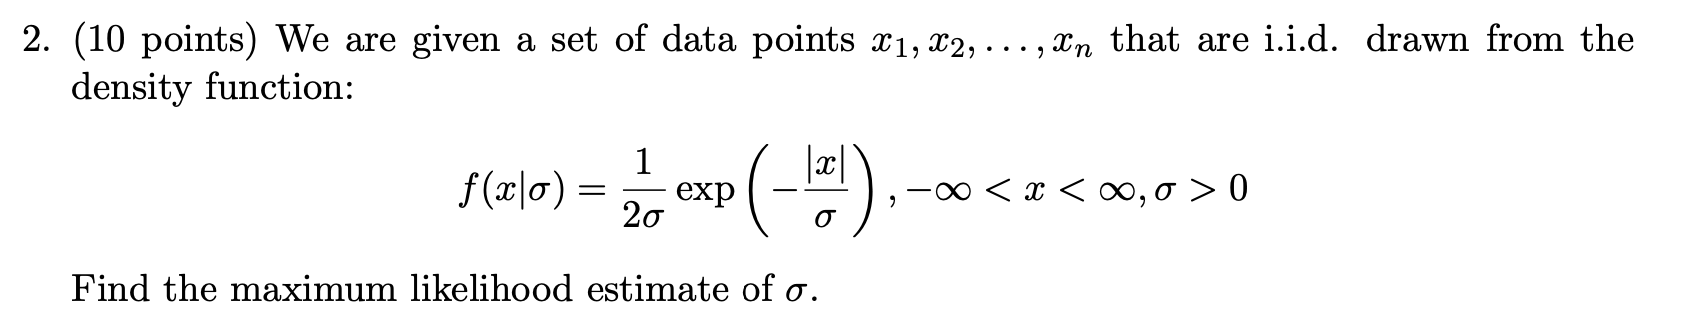

The likelihood is

$\mathcal{L} = \prod_{i=1}^n$ $ \frac{1}{2\sigma}\exp(-\frac{|x_i|}{\sigma})$

We want to find the value of $\sigma$ that maximizes the likelihood. It's more favorable to work with the log-likelihood,

$\ln(\mathcal{L}) = -n\ln(2\sigma) \sum_{i=1}^n - \sum_i\frac{|x_i|}{\sigma}$

Maximizing is the same as minimizing $-\ln(\mathcal{L})$, and to find an extremum we differentiate with respect to $\sigma$ and set that equal to zero

$-\frac{d\ln\mathcal{L}}{d\sigma} =\frac{1}{\sigma} \left(n - \sum_i \frac{|x_i|}{\sigma}\right)$

$\sigma^* = \frac{1}{n}\sum_i |x_i|$



# Problem 3

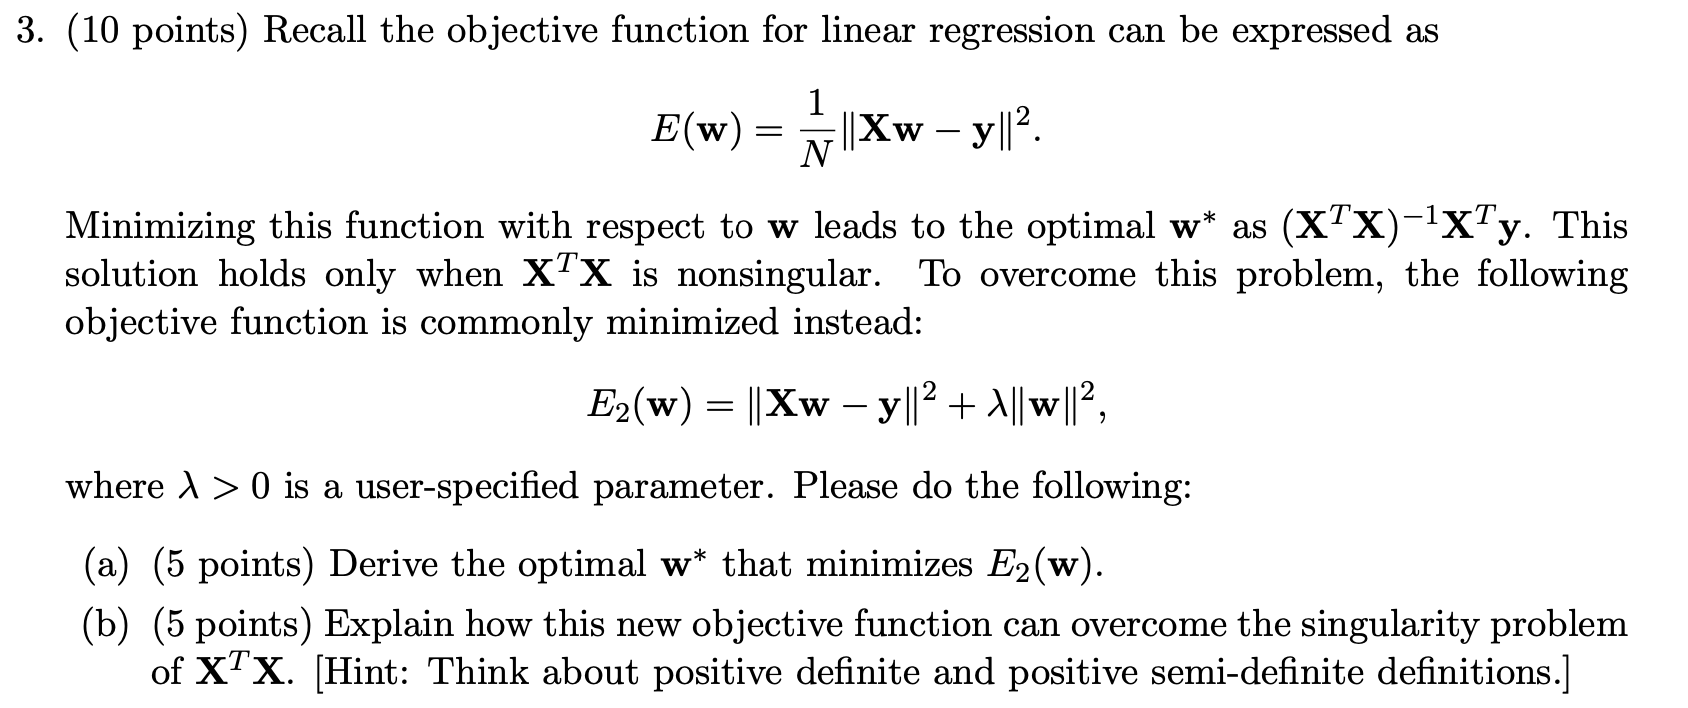

$\frac{d E_2(\mathbf{w})}{d \mathbf{w}} = \frac{d}{d\mathbf{w}}\left[ (\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y}) + \lambda\mathbf{w}^T\mathbf{w} \right] = \frac{d}{d\mathbf{w}}\left[ \mathbf{w}^T \mathbf{X}^T \mathbf{X}\mathbf{w} - 2 \mathbf{y}^T \mathbf{X}\mathbf{w} + \mathbf{y}^T \mathbf{y} + \lambda \mathbf{w}^T\mathbf{w} \right] = \frac{d}{d\mathbf{w}}\left[ \mathbf{w}^T (\mathbf{X}^T \mathbf{X} + \lambda)\mathbf{w} - 2 \mathbf{y}^T \mathbf{X}\mathbf{w} + \mathbf{y}^T \mathbf{y} \right] =  \mathbf{w}^T (\mathbf{X}^T \mathbf{X} + \lambda) - 2 \mathbf{y}^T \mathbf{X}$

$2(\mathbf{X}^T \mathbf{X} + \lambda)\mathbf{w} - 2 \mathbf{X}^T \mathbf{y} = 0 \rightarrow \mathbf{w}^* = (\mathbf{X}^T \mathbf{X} + \lambda)^{-1}\mathbf{X}^T \mathbf{y}$

(a)Again: $\mathbf{w}^* = (\mathbf{X}^T \mathbf{X} + \lambda)^{-1}\mathbf{X}^T \mathbf{y}$

(b) This overcomes the singularity problem because $\mathbf{X}^T\mathbf{X}$ is positive semi-definite (it can be zero or positive), so adding a value > 0 to it when it is a scalar makes it positive definite. Positive definite quantities are invertible, so this objective function will always exist, even if $\lambda \rightarrow 0$.

# Problem 4
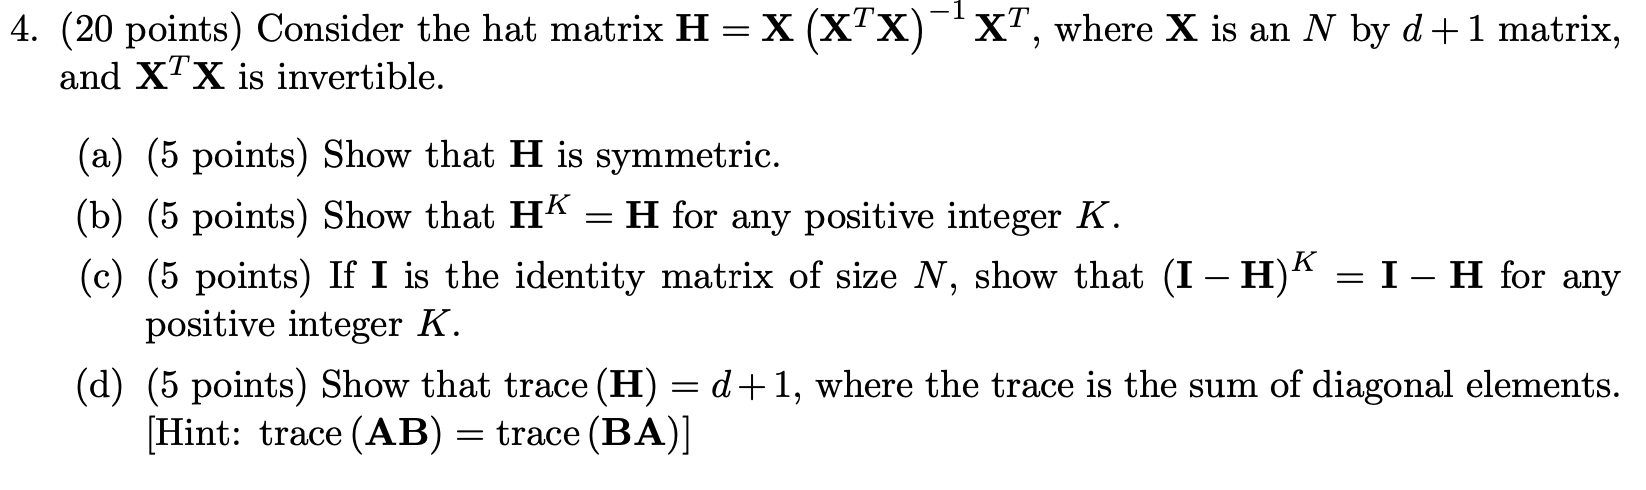

(a) A symmetric matrix is once which satisfies the property $\mathbf{H}^T = \mathbf{H}$.

$\mathbf{H}^T = [\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T]^T$

Note $(\mathbf{A}\mathbf{B}\mathbf{C})^T = \mathbf{C}^T\mathbf{B}^T\mathbf{A}^T$

so

$\mathbf{H}^T = \mathbf{X}[(\mathbf{X}^T\mathbf{X})^{-1}]^T\mathbf{X}^T$

And note $(\mathbf{A}^{-1})^T = (\mathbf{A}^T)^{-1}$

so applying this and the above rule,

$\mathbf{H}^T = \mathbf{X}[(\mathbf{X}^T\mathbf{X})^{-1}]\mathbf{X}^T = \mathbf{H}$.

(b) $\mathbf{H}^K = \prod_{i=1}^K \mathbf{H} = \prod_{i=1}^K \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$

Imagine the case where $K = 2$, $\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$. Note that $(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X} = \mathbf{I}$, and every time we increase $K$ by one, we get this factor appearing one more time, so

$\mathbf{H}^K = \mathbf{X} \left(\prod_{i=1}^{K-1} (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}\right)(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T = \left(\prod_{i=1}^{K-1} \mathbf{I}\right)(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T = \mathbf{H}$

(c) $(\mathbf{I} - \mathbf{H})^K = \prod_{i=1}^{K}(\mathbf{I} - \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T)$.

Consider the case where $K = 2$, $(\mathbf{I} - \mathbf{H})^2 = \mathbf{I}\mathbf{I} - (\mathbf{I}\mathbf{H} + \mathbf{H}\mathbf{I}) + \mathbf{H}\mathbf{H}$

Using the expression from (b) and the definition of identity, this is just $\mathbf{I} - 2\mathbf{H} + \mathbf{H} = \mathbf{I} - \mathbf{H}$.

As $K$ increases, we can always apply the expression from above recursively. We know that when for $K = 2$ the expression is true, so we can break up e.g., $K = 3$ into a $K=2$ expression and a $K=1$ expression. The $K=1$ expression is true, so the total expression left can be written as $K=2$, and we can apply the rule again. And on and on...

(d) $\mathbf{H} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$

$\mathrm{Tr}(\mathbf{H}) = \mathrm{Tr}(\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T) = \mathrm{Tr}((\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{X}) = \mathrm{Tr}(\mathrm{I}) = \sum_{i=1}^{d+1} 1 = d + 1$.

Note: I got confused about dimensionality. The way the problem is written suggests $\mathbf{H}$ is $N$x$N$ I think? But it's $(d+1)^2$.

# Problem 5
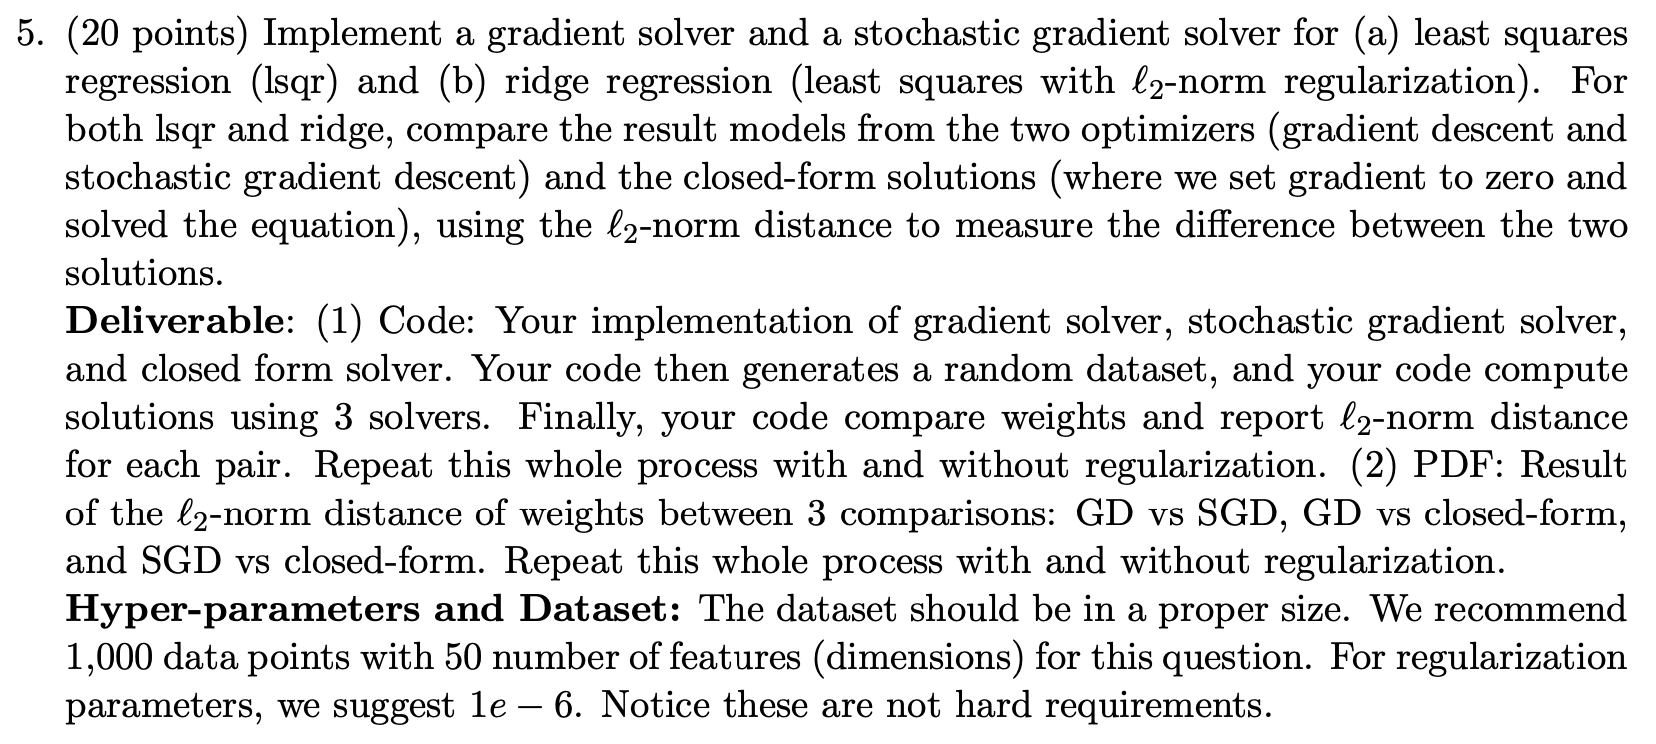

Turns out 'pdf' doesn't mean 'probability density function' here, it just means make an image of this thing.

In [4]:
x = np.random.rand(50*1000).reshape(1000,50) * 2 - 1
slopes = np.random.rand(50) - 0.5
intercept = np.random.rand(1) - 0.5
y = x @ slopes + intercept

## Standard linear regression

In [5]:
def train_model(x, y, lr=1e-2, lam=0, epochs=1000, stochastic=False):
    n_data, n_feat = x.shape

    x_with_bias = np.concatenate([x, np.ones((n_data,1))], axis=1)
    gd_weights = np.zeros(n_feat+1)

    losses = []
    for i in range(epochs):
        y_hat = x_with_bias @ gd_weights
        full_loss = np.mean((y - y_hat)**2) + lam * gd_weights.T @ gd_weights
        losses.append(full_loss)

        # dL/dw = (1/N) sum_i d[(y_i - x_i.T @ w)^2]/dw = (1/N) sum_i (-2) x_i.T * (y_i - x_i.T @ w)
        if stochastic:
            pick = np.random.randint(y_hat.shape[0])
            loss = ((y - y_hat)**2)[pick]
            grad = -2 * (x_with_bias[pick].T * (y - y_hat)[pick]) + 2 * lam * gd_weights.T
        else:
            loss = full_loss
            grad = -2 * (x_with_bias.T * (y - y_hat)).mean(axis=1) + 2 * lam * gd_weights
        gd_weights -= lr * grad
    return gd_weights, losses
    

Text(0, 0.5, 'loss')

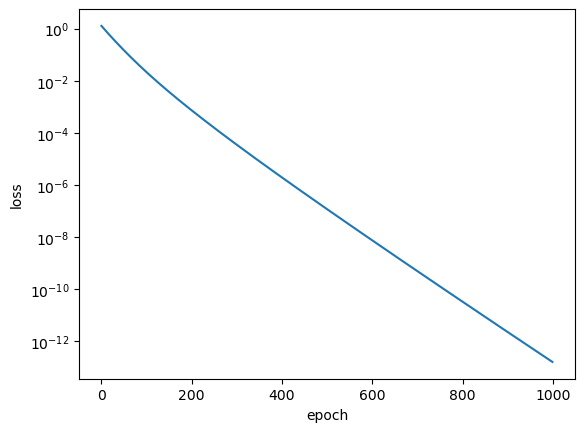

In [6]:
gd_weights, gd_losses = train_model(x, y, lr=3e-2)
plt.semilogy(gd_losses)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

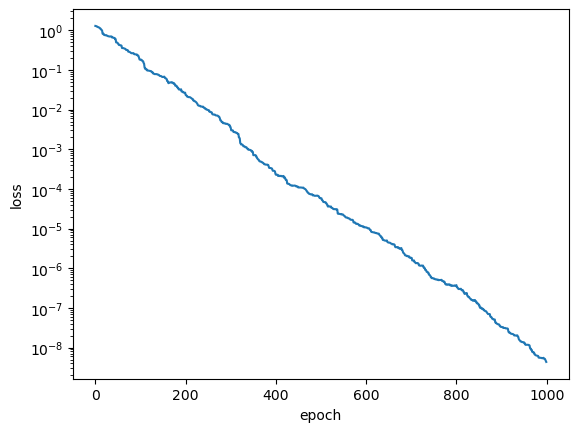

In [7]:
sgd_weights, sgd_losses = train_model(x, y, stochastic=True, lr=3e-2)
plt.semilogy(sgd_losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [8]:
# Closed-form.
n_data, n_feat = x.shape
x_with_bias = np.concatenate([x, np.ones((n_data,1))], axis=1)
xTx = x_with_bias.T @ x_with_bias
w_optimal = np.linalg.inv(xTx) @ x_with_bias.T @ y

In [9]:
sgd_vs_gd      = np.sqrt(np.sum((gd_weights - sgd_weights)**2))
sgd_vs_optimal = np.sqrt(np.sum((w_optimal - sgd_weights)**2))
gd_vs_optimal  = np.sqrt(np.sum((w_optimal - gd_weights)**2))

print('L2 norm distances:')
print(f'SGD vs GD: {sgd_vs_gd:.3e}')
print(f'SGD vs optimal: {sgd_vs_optimal:.3e}')
print(f'GD vs optimal: {gd_vs_optimal:.3e}')

# plt.hist(sgd_vs_gd, bins=10, alpha=0.5, label='SGD vs GD', color='green');
# plt.hist(sgd_vs_optimal, bins=10, alpha=0.5, label='SGD vs optimal', color='orange');
# plt.hist(gd_vs_optimal, bins=10, alpha=0.5, label='GD vs optimal', color='purple');
# plt.legend()

L2 norm distances:
SGD vs GD: 1.155e-04
SGD vs optimal: 1.156e-04
GD vs optimal: 8.343e-07


## Ridge regression linear regression

Text(0, 0.5, 'loss')

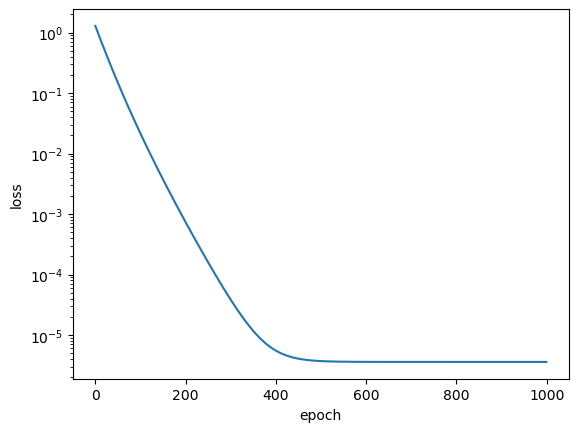

In [10]:
gd_weights, gd_reg_losses = train_model(x, y, lam=1e-6, lr=3e-2)
plt.semilogy(gd_reg_losses)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

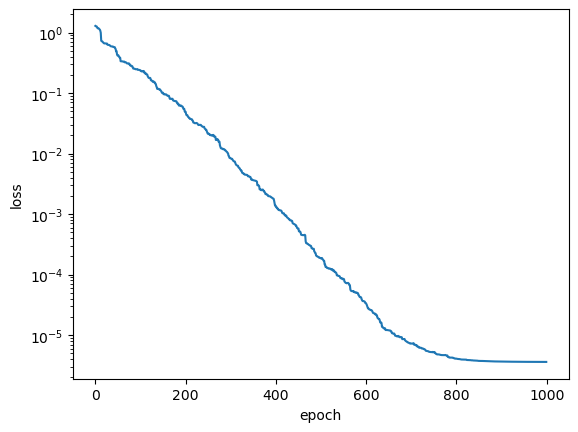

In [11]:
sgd_weights, sgd_reg_losses = train_model(x, y, stochastic=True, lam=1e-6, lr=3e-2)
plt.semilogy(sgd_reg_losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [12]:
# Closed-form.
lam = 1e-6
n_data, n_feat = x.shape
x_with_bias = np.concatenate([x, np.ones((n_data,1))], axis=1)
xTx = x_with_bias.T @ x_with_bias + lam
w_optimal = np.linalg.inv(xTx) @ x_with_bias.T @ y

In [13]:
sgd_vs_gd      = np.sqrt(np.sum((gd_weights - sgd_weights)**2))
sgd_vs_optimal = np.sqrt(np.sum((w_optimal - sgd_weights)**2))
gd_vs_optimal  = np.sqrt(np.sum((w_optimal - gd_weights)**2))

print('L2 norm distances:')
print(f'SGD vs GD: {sgd_vs_gd:.3e}')
print(f'SGD vs optimal: {sgd_vs_optimal:.3e}')
print(f'GD vs optimal: {gd_vs_optimal:.3e}')

# plt.hist(sgd_vs_gd, bins=10, alpha=0.5, label='SGD vs GD', color='green');
# plt.hist(sgd_vs_optimal, bins=10, alpha=0.5, label='SGD vs optimal', color='orange');
# plt.hist(gd_vs_optimal, bins=10, alpha=0.5, label='GD vs optimal', color='purple');
# plt.legend()

L2 norm distances:
SGD vs GD: 2.072e-04
SGD vs optimal: 2.053e-04
GD vs optimal: 6.202e-06


# Problem 6
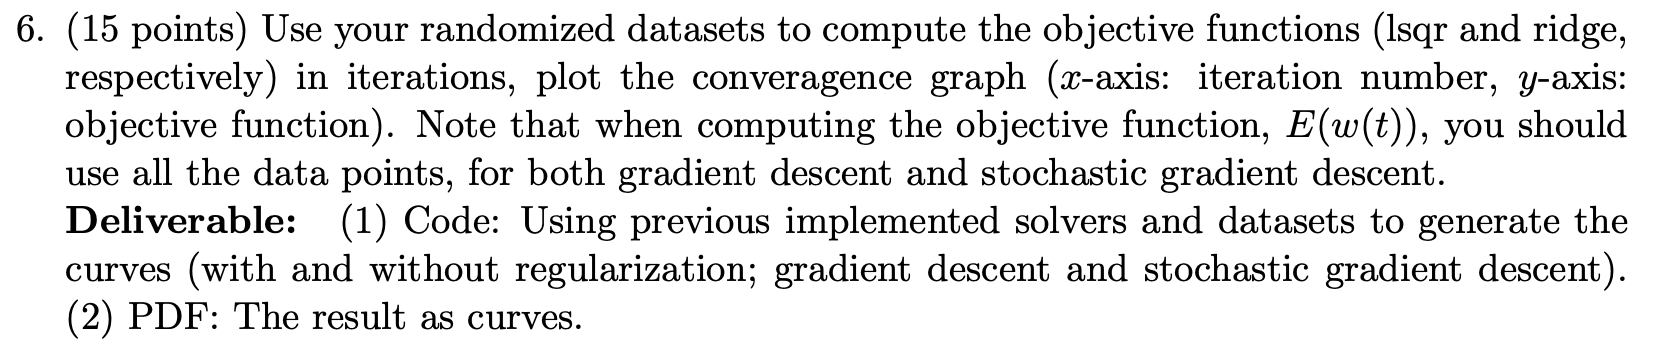

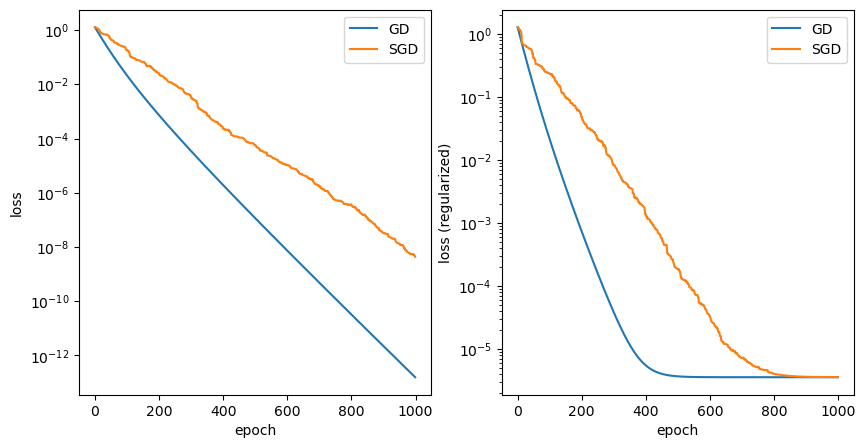

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].semilogy(gd_losses, label='GD')
axs[0].semilogy(sgd_losses, label='SGD')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()

axs[1].semilogy(gd_reg_losses, label='GD')
axs[1].semilogy(sgd_reg_losses, label='SGD')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss (regularized)')
axs[1].legend()

# Problem 7
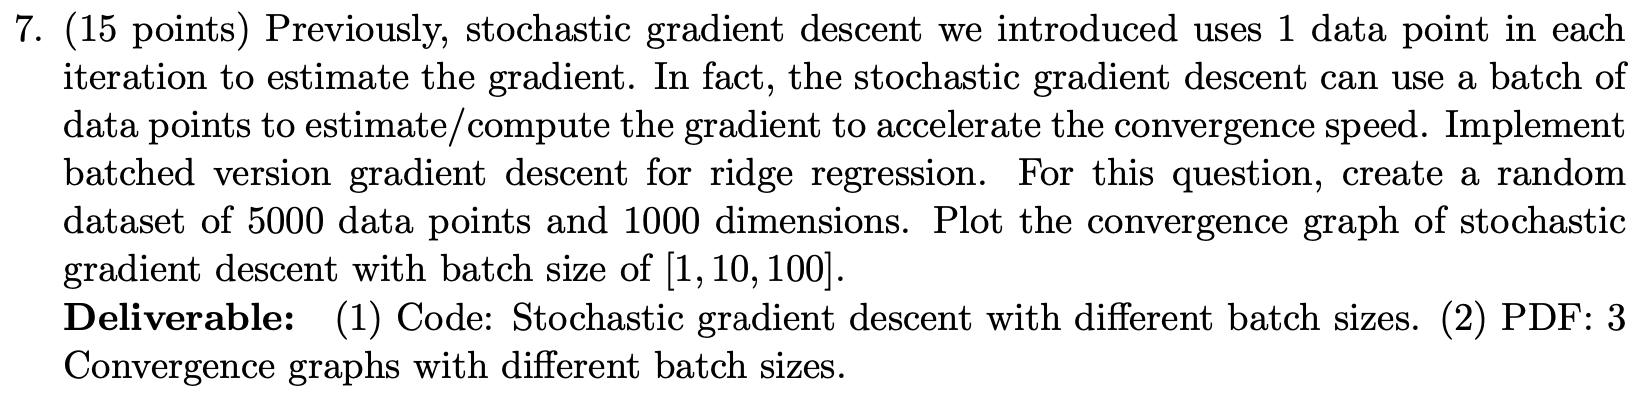

In [23]:
def train_batch_sgd(x, y, lr=1e-2, lam=0, epochs=1000, batch_size=1):
    n_data, n_feat = x.shape
    indices = np.arange(n_data)

    x_with_bias = np.concatenate([x, np.ones((n_data,1))], axis=1)
    gd_weights = np.zeros(n_feat+1)

    losses = []
    for i in range(epochs):
        y_hat = x_with_bias @ gd_weights
        full_loss = np.mean((y - y_hat)**2) + lam * gd_weights.T @ gd_weights
        losses.append(full_loss)

        random.shuffle(indices)
        pick = indices[:batch_size]
        loss = np.mean(((y - y_hat)**2)[pick])
        grad = -(2/batch_size) * x_with_bias[pick,:].T @ (y - y_hat)[pick] + 2 * lam * gd_weights.T
        gd_weights -= lr * grad
    return gd_weights, losses



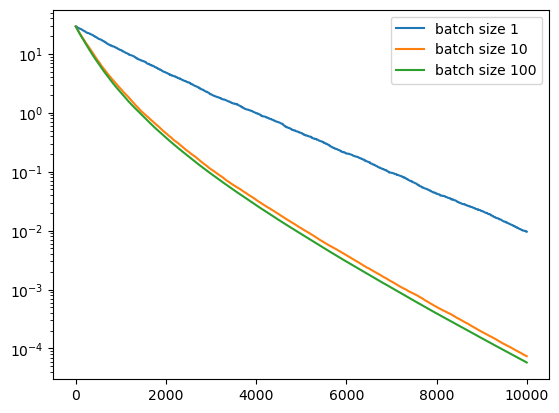

In [28]:
x = np.random.rand(1000*5000).reshape(5000,1000) * 2 - 1
slopes = np.random.rand(1000) - 0.5
intercept = np.random.rand(1) - 0.5
y = x @ slopes + intercept

kwargs = {'lr': 2e-3, 'epochs': 10000}
weights_1, losses_1 = train_batch_sgd(x, y, batch_size=1, **kwargs)
weights_10, losses_10 = train_batch_sgd(x, y, batch_size=10, **kwargs)
weights_100, losses_100 = train_batch_sgd(x, y, batch_size=100, **kwargs)
plt.semilogy(losses_1, label='batch size 1')
plt.semilogy(losses_10, label='batch size 10')
plt.semilogy(losses_100, label='batch size 100')
plt.legend()